# 1) Data Preprocessing

In [3]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model

In [8]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [9]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
# drop garbage columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [11]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# rename columns
df.columns = ['labels', 'data']

In [13]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.shape

(5572, 2)

In [15]:
# create binary labels (0 and 1)
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1}) # create new column as 'b_labels'
y = df['b_labels'].values

In [16]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [17]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(df['data'], y, test_size=0.33)

In [35]:
max_vocab_size = 20000
tokenizer = Tokenizer(num_words=max_vocab_size)

In [36]:
tokenizer.fit_on_texts(x_train)

In [37]:
tokenizer

In [44]:
sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)

In [39]:
sequences_train

[[217, 77, 9, 94, 263],
 [379, 1, 65, 20, 1796, 2, 12, 474, 584],
 [104,
  1481,
  33,
  93,
  8,
  11,
  3356,
  226,
  8,
  902,
  976,
  22,
  1,
  321,
  72,
  2,
  29,
  5,
  1098,
  816,
  585],
 [3357, 30, 4, 2286, 3358, 28, 11, 226, 97, 203, 3, 1482],
 [116, 5, 3359, 422, 9, 44, 46, 1258, 182, 10, 50, 34, 45, 43, 121, 3, 68],
 [40,
  1483,
  2,
  2287,
  6,
  20,
  5,
  3360,
  120,
  404,
  4,
  903,
  6,
  235,
  308,
  447,
  1484,
  108,
  1485,
  21,
  2288,
  1259,
  904,
  3361,
  3362,
  40,
  73,
  86,
  42,
  5,
  3363],
 [56, 264, 27, 29],
 [423, 3, 175, 3, 762],
 [15, 708, 1, 364, 1099, 38, 61, 10, 18, 817, 162, 19],
 [200, 3, 25, 818, 10, 11, 66, 1, 2289, 3],
 [3364,
  1797,
  6,
  3365,
  48,
  8,
  586,
  299,
  67,
  207,
  227,
  1798,
  2290,
  1486,
  3366,
  36,
  3367,
  98,
  311,
  3368,
  424],
 [1,
  106,
  50,
  277,
  207,
  250,
  819,
  3369,
  1487,
  70,
  3370,
  905,
  546,
  18,
  906,
  25,
  2291,
  56,
  448,
  670],
 [95, 763, 111, 3371, 10

In [45]:
x_train[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [46]:
sequences_train[0]

[217, 77, 9, 94, 263]

In [47]:
len(sequences_train[0])

5

In [48]:
len(sequences_train[1])

9

In [49]:
# Convert sentences to sequences
max_vocab_size = 20000
tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(x_train)
sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)

In [50]:
# Check word index mapping (to check the number of words in vocabulary)
word2idx = tokenizer.word_index
V = len(word2idx)
print('Total number of unique tokens are: %s' % V)

Total number of unique tokens are: 7163


In [51]:
# pad sequences (to get  N x T matrix)
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

# N: number of samples and T: Number of time steps

Shape of data train tensor: (3733, 189)


In [52]:
data_train[0]
len(data_train[0])

189

In [53]:
len(data_train[1])

189

In [57]:
data_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [54]:
# set the value of T to get sequence length
T = data_train.shape[1]

In [55]:
print(T)

189


In [56]:
# pad the test set
data_test = pad_sequences(sequences_test, maxlen=T)
# maxlen = T, to truncate longer sentences in test set
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1839, 189)


In [69]:
sequences_test

[[668, 58, 373, 298],
 [447, 1, 5356, 11, 663, 2128, 19, 1, 415, 28, 202],
 [131, 497, 437, 32, 175, 3, 28, 4180],
 [43,
  2,
  122,
  4,
  531,
  124,
  152,
  25,
  28,
  49,
  888,
  2,
  122,
  696,
  124,
  6,
  67,
  72,
  2,
  30,
  125,
  4,
  283,
  21,
  158,
  1138,
  42,
  44,
  46,
  56,
  44,
  46,
  44,
  46,
  56,
  6276,
  44,
  46,
  177,
  1159,
  44,
  46,
  44,
  46,
  44,
  46,
  1403,
  44,
  46,
  44,
  46,
  44,
  46,
  528,
  44,
  46,
  44,
  46,
  2967,
  44,
  46,
  44,
  46,
  44,
  46,
  44,
  46,
  44,
  46,
  44,
  46],
 [37,
  568,
  63,
  25,
  4523,
  11,
  993,
  61,
  208,
  1472,
  298,
  33,
  6,
  34,
  6,
  1037,
  749,
  11,
  474,
  1054,
  6,
  1202,
  30,
  2931,
  44,
  46,
  876,
  7,
  1024,
  30,
  44,
  46,
  876,
  1,
  32,
  295,
  11,
  1700,
  724,
  14,
  9,
  44,
  46,
  876],
 [86, 78, 16, 97],
 [907, 3, 141, 123, 2, 59, 63, 448],
 [7066,
  56,
  79,
  5,
  132,
  27,
  143,
  6,
  1364,
  13,
  518,
  704,
  281,
  1067,
  409,

# 2) Building the Model

In [59]:
# Create the model

# Choose embedding dimensionality
D = 20  # this is a hyper parameter, we can choose any word vector size that we want

# Input layer
i = Input(shape=(T,))  # input layer takes in sequences of integers, so shape is T

# Embedding layer
x = Embedding(V + 1, D)(i) # This takes in sequences of integers and returns sequences of word vectors
# This will be an N * T * D array
# we want size of embedding to (V + 1) x D, because first word index starts from 1 and not 0

#  First CNN layer
x = Conv1D(32, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)

# Second CNN layer
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)

# Third CNN layer
x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)

# Dense layer
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [60]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [61]:
# Train the model
r = model.fit(x=data_train, y=y_train, epochs=5, validation_data=(data_test, y_test))

Epoch 1/5
117/117 [==============================] - 4s 13ms/step - loss: 0.3998 - accuracy: 0.8564 - val_loss: 0.2876 - val_accuracy: 0.8733
Epoch 2/5
117/117 [==============================] - 1s 11ms/step - loss: 0.1481 - accuracy: 0.9344 - val_loss: 0.0858 - val_accuracy: 0.9815
Epoch 3/5
117/117 [==============================] - 2s 13ms/step - loss: 0.0242 - accuracy: 0.9928 - val_loss: 0.0759 - val_accuracy: 0.9848
Epoch 4/5
117/117 [==============================] - 2s 13ms/step - loss: 0.0060 - accuracy: 0.9989 - val_loss: 0.0698 - val_accuracy: 0.9853
Epoch 5/5
117/117 [==============================] - 1s 12ms/step - loss: 0.0023 - accuracy: 0.9997 - val_loss: 0.0762 - val_accuracy: 0.9859


In [74]:
r

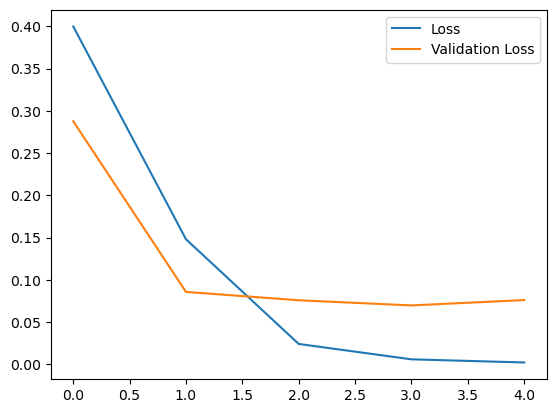

In [62]:
# Loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

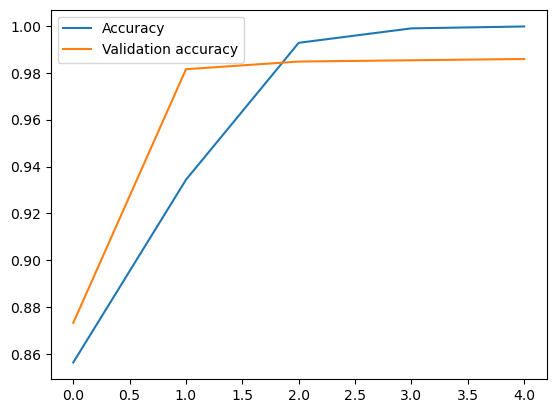

In [63]:
# Accuracy per iteration
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

In [71]:
# pad the test set
d = pad_sequences(new_sequence, maxlen=T)
# maxlen = T, to truncate longer sentences in test set
print('Shape of data test tensor:', d.shape)

Shape of data test tensor: (1, 189)


In [77]:
# New text to classify
new_text = "call 78787 to win 78909999 rupees!"

# Preprocess the text
new_sequence = tokenizer.texts_to_sequences([new_text])



In [78]:
new_sequence

[[16, 2, 191]]

In [79]:
# Predict using the model
prediction = model.predict(d)
prediction


1/1 [==============================] - 0s 31ms/step


array([[0.00058948]], dtype=float32)

In [80]:
# Interpret the prediction
if prediction > 0.5:
    print("The text is likely spam.")
else:
    print("The text is likely not spam.")


The text is likely not spam.
